# Should We Trust that Hiking Trail Rating?

## Contributors:
- Ahmed Al Ayoubi
- Chris Kirchberg
- Harlan Kefalas

## Motivation and Dataset:
When looking for hikes, sometimes the rating and difficulty specified at websites do not always seem to meet expectations of those who hike the trail of interest.

Taking a look a various websites, we settled on using https://www.hikingproject.com to scrape information from hikes in the state of Colorado. Currently the site lists 5,855 trails in that state which are curated by staff or contibutors. Other sites like www.alltrails.com look like they would be good sites but have web scraping prevention tools in place which makes it difficult to extract information.

## Task Definition/Research Question:
As a prospective hiker of a trail, questions come to mind before choosing that trail to hike:
- Does the ratings/difficulty stated by the reviewers match that of the currated trail?
- Is there other information about the trail that might give us a better idea as what the trail should be rated?
- Is there information that might corroborate the trails difficulty/rating either by the currator or the reviewers?

Answers to these questions could possibly be gleaned by scraping data from website like https://www.hikingproject.com, cleaned and then explored by visualizations and simple summary statistics. This project seeks out to explore some possible answers and directions to these questions.

## Literature Review:
Upon searching the web for similar types of tasks, APIs, or others who have attempted something similar, we ran accross this GitHub page: https://github.com/oschow/take-a-hike

It used packages like Selenium, MongoDB, Pandas, sklearn and other resources to scrape infromation from www.alltrails.com, model, visualize and create a Hike Recommendation web app to find hikes that are similar to the hikers interests or whims.

This seemed like a good start to try our hand at exploring ratings...until we ran into blocks in web scrapping AllTrails.com...and so our journey began.

## Data Cleaning:

Insert Steps and Findings here. Possibly some summary stats and data types.

## Visualizations:

Insert types of visualizaitons and why. What can we get out of it. Distributions on each feature/variable. Plot of difficulty vs. user entered difficulty. Plotting different variables/features vs. average rating. Save more difficulty level. Distribution of ratings (use a heatmap and cluster using Seaborn).  Try multple regression of features to see what might impact rating the most (not a predicite model, but a descriptive model).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

# Read the cleaned hiking dataset pickle file  
df_o = pd.read_pickle("./Hiking Project/scrape_clean//hike_project_cln_data.pkl")

df=df_o.copy(deep=True)
for i in range(len(df)):
    if pd.isna(df.loc[i,'Features']) is False:
        df['Features'][i]=df['Features'][i].split(sep ='·')

df['Difficulty Number']=df['Difficulty Number'].astype('category')

/var/folders/sz/rx6y_vgj2pn_cyl0_2gd1qs40000gn/T/ipykernel_40969/3389602482.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Features'][i]=df['Features'][i].split(sep ='·')


In [5]:
# Get basic information about the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Trail Name         3364 non-null   object  
 1   State              3364 non-null   object  
 2   City               3364 non-null   object  
 3   Area               2610 non-null   object  
 4   Site               232 non-null    object  
 5   Trail Length       3364 non-null   float64 
 6   Trail Difficulty   3364 non-null   object  
 7   Difficulty Number  3364 non-null   category
 8   Trail Rating       2958 non-null   float64 
 9   User Review        2958 non-null   Int64   
 10  Trail Type         3364 non-null   object  
 11  Elev_Up            3364 non-null   float64 
 12  Elev_Down          3364 non-null   float64 
 13  Highest Elevation  3364 non-null   float64 
 14  Lowest Elevation   3364 non-null   float64 
 15  Average Grade      3364 non-null   float64 
 16  Max Gr

,Trail Length,Trail Rating,User Review,Elev_Up,Elev_Down,Highest Elevation,Lowest Elevation,Average Grade,Max Grade
count,3364.000000,2958.000000,2958.0,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000
mean,3.506897,3.368627,3.980392,565.637931,349.931034,6810.465517,6293.258621,0.046034,0.143448
std,4.465425,0.748586,4.056619,1187.185556,842.813708,1974.600376,1396.786628,0.051668,0.148434
min,0.100000,2.000000,1.0,0.000000,0.000000,5135.000000,5044.000000,0.000000,0.010000
25%,1.300000,3.000000,1.0,22.000000,14.000000,5381.000000,5280.000000,0.010000,0.030000
50%,2.000000,3.500000,2.0,72.500000,92.000000,5999.500000,5696.500000,0.020000,0.100000
75%,2.600000,4.000000,5.0,657.000000,346.000000,7132.000000,6771.000000,0.070000,0.190000
max,22.100000,4.700000,19.0,6930.000000,5527.000000,13247.000000,10423.000000,0.280000,0.620000


/Users/cjkirchberg/Library/Mobile Documents/com~apple~CloudDocs/DU Data Science/COMP_4447/Final Project/COMP_4447_Final_Project/FP_venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


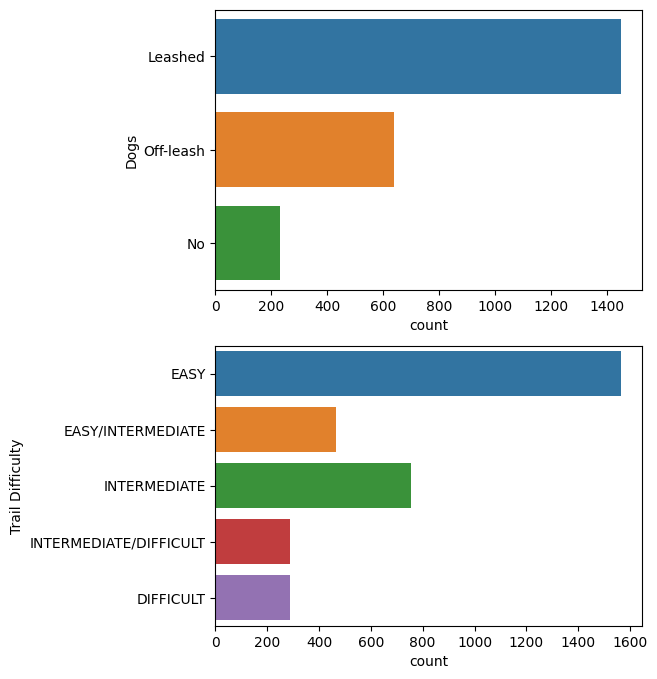

In [7]:
# Plot count data of Dogs and Trail Difficulty on Bar Graphs
plt.rcParams["figure.figsize"] = [5.5, 8]
plt.rcParams["figure.autolayout"] = True
ax = plt.GridSpec(2, 1)
ax.update(wspace=0.5, hspace=0.2)

ax1 = plt.subplot(ax[0, 0])
sns.countplot(y=df['Dogs'])

ax2 = plt.subplot(ax[1, 0])
sns.countplot(y=df['Trail Difficulty'],
              order=['EASY', 'EASY/INTERMEDIATE','INTERMEDIATE',
                     'INTERMEDIATE/DIFFICULT' ,'DIFFICULT'])
plt.show()

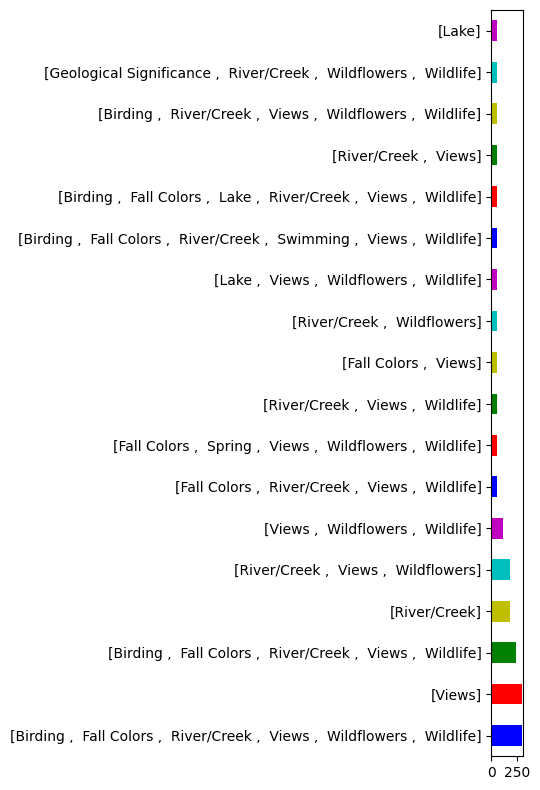

In [8]:
# Plot count data of Features on Bar Graphs
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c','m']), None, len(df)))
df['Features'].value_counts(dropna=True).plot.barh(color=my_colors)
plt.show()

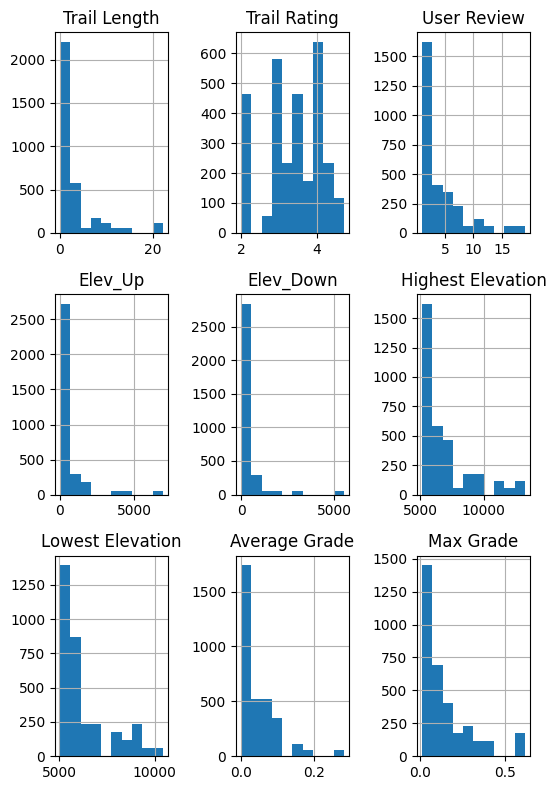

In [9]:
# Plot count data of numeric columns on Histograms
df.hist()
plt.show()

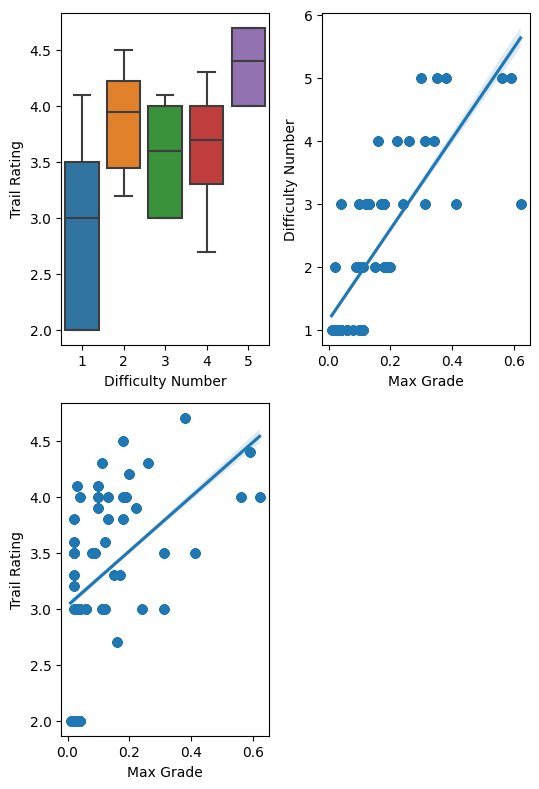

In [10]:
# Plot Box Plot for Difficulty Number vs. Trail Rating
plt.subplot(221)
sns.boxplot(x='Difficulty Number',y='Trail Rating',data=df)

# Plot regression lines and scatter plots for Max Grade vs.
# Difficulty Number and Trail Rating
plt.subplot(222)
sns.regplot(x='Max Grade',y='Difficulty Number',data=df,dropna = True)

plt.subplot(223)
sns.regplot(x='Max Grade',y='Trail Rating',data=df,dropna = True)
plt.show()